##Importing Libraries

In [ ]:
import networkx as networkx #A Python library for creating, analyzing, and visualizing complex networks (graphs).
import io #Input/output utilities.
import numpy as np #Numerical computing library for working with arrays.
import pandas as pd #Data manipulation and analysis library.
import itertools #Module that provides various functions that work on iterators to produce complex iterators
from scipy.sparse import csr_matrix #Compressed Sparse Row matrix from SciPy, useful for sparse matrix operations
import matplotlib.pyplot as plt #Plotting library.
import time #Module for dealing with time-related tasks.
!pip install 'scipy>=1.8' #Python library used for scientific computing and technical computing.[3]

##Importing Files


In [ ]:
#Here, we use a small-sized dataset (14496 edges) retrieved from http://snap.stanford.edu/data/ego-Facebook.html
#We need two more datasets for sufficient comparison of Doulion:
#medium-sized dataset (93497 edges) retrieved from http://snap.stanford.edu/data/ca-CondMat.html
#large-sized dataset (2766607 edges) retrieved from http://snap.stanford.edu/data/roadNet-CA.html

#But you can manually upload a file. The uploaded file is then stored in the uploaded variable.
from google.colab import files
uploaded = files.upload()

Saving CA-CondMat.txt to CA-CondMat.txt
Saving com-amazon.ungraph.txt to com-amazon.ungraph.txt
Saving facebook_combined.txt to facebook_combined.txt
Saving roadNet-CA.txt to roadNet-CA.txt
Saving WikiTalk.txt to WikiTalk.txt


##Creating Graphs

In [ ]:
#It reads the uploaded file (roadNet-CA.txt) as an edgelist, creating an undirected graph (nx.Graph()) and specifying that the node type is integer.
#The resulting graph is stored in the variable g.

g1 = networkx.read_edgelist(io.BytesIO(uploaded["facebook_combined.txt"]),create_using=networkx.Graph(), nodetype = int)
g2 = networkx.read_edgelist(io.BytesIO(uploaded["CA-CondMat.txt"]),create_using=networkx.Graph(), nodetype = int)
g3 = networkx.read_edgelist(io.BytesIO(uploaded["com-amazon.ungraph.txt"]),create_using=networkx.Graph(), nodetype = int)
g4 = networkx.read_edgelist(io.BytesIO(uploaded["roadNet-CA.txt"]),create_using=networkx.Graph(), nodetype = int)

##Calculating Triangles in the Graph

In [ ]:
#Calculating the number of triangles in the graphs using NetworkX's triangles function.
#It sums up the triangle counts for each node and then divides by 3, as each triangle is counted three times in an undirected graph.
triangles_g1 = sum(networkx.triangles(g1).values()) / 3
print("The number of triangles on graph g1 are",int(triangles_g1))
triangles_g2 = sum(networkx.triangles(g2).values()) / 3
print("The number of triangles on graph g2 are",int(triangles_g2))
triangles_g3 = sum(networkx.triangles(g3).values()) / 3
print("The number of triangles on graph g3 are",int(triangles_g3))
triangles_g4 = sum(networkx.triangles(g4).values()) / 3
print("The number of triangles on graph g4 are",int(triangles_g4))

The number of triangles on graph g1 are 1612010
The number of triangles on graph g2 are 173361
The number of triangles on graph g3 are 667129
The number of triangles on graph g4 are 120676


##Removing self-loops

In [ ]:
#Removing any self-loops from the graphs. Self-loops are edges that connect a node to itself.
g1.remove_edges_from(networkx.selfloop_edges(g1))
g2.remove_edges_from(networkx.selfloop_edges(g2))
g3.remove_edges_from(networkx.selfloop_edges(g3))
g4.remove_edges_from(networkx.selfloop_edges(g4))

##Visualizing the Graphs.



 Graphical Representation of G1: 




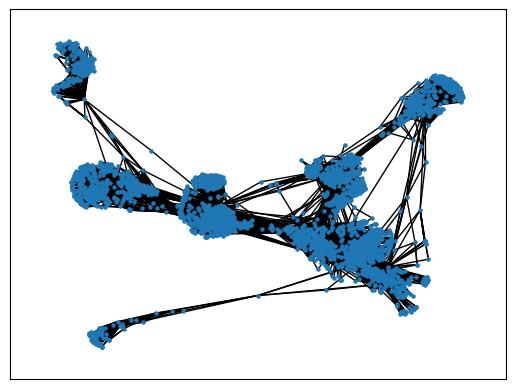

In [ ]:
print('\n\n Graphical Representation of G1: \n\n')
networkx.draw_networkx(g1,with_labels=False, node_size=5)

In [ ]:
#print('\n\n Graphical Representation of G2: \n\n')
#networkx.draw_networkx(g2,with_labels=False, node_size=5)

In [ ]:
#print('\n\n Graphical Representation of G3: \n\n')
#networkx.draw_networkx(g3,with_labels=False, node_size=10)

In [ ]:
#print('\n\n Graphical Representation of G4: \n\n')
#networkx.draw_networkx(g4,with_labels=False, node_size=10)

##Brute-force (All triplets)

In [ ]:
#It directly iterates through all triplets of nodes and checks if there's an edge between each pair, effectively counting triangles.
def all_triplets(g):
    start_time = time.process_time()

    triangles = 0

    for node1 in g.nodes():
        for node2 in g.neighbors(node1):
            for node3 in g.neighbors(node2):
                if g.has_edge(node1, node3):
                    triangles += 1

    triangles = triangles // 6 # Divide by 6 to account for counting each triangle six times

    end_time = (time.process_time() - start_time)

    return triangles, end_time

In [ ]:
All_Triangles_g1, All_Triangles_g1_time = all_triplets(g1)
print("The number of triangles that brute force algorithm has found on graph g1 are",All_Triangles_g1)
print("Total runtime for graph g1:",All_Triangles_g1_time)

The number of triangles that brute force algorithm has found on graph g1 are 1612010
Total runtime for graph g1: 5.7498185860000035


In [ ]:
All_Triangles_g2, All_Triangles_g2_time = all_triplets(g2)
print("The number of triangles that brute force algorithm has found on graph g2 are",All_Triangles_g2)
print("Total runtime for graph g2:",All_Triangles_g2_time)

The number of triangles that brute force algorithm has found on graph g2 are 173361
Total runtime for graph g2: 1.383453779000007


In [ ]:
All_Triangles_g3, All_Triangles_g3_time = all_triplets(g3)
print("The number of triangles that brute force algorithm has found on graph g3 are",All_Triangles_g3)
print("Total runtime for graph g3:",All_Triangles_g3_time)

The number of triangles that brute force algorithm has found on graph g3 are 667129
Total runtime for graph g3: 9.418193424999998


In [ ]:
All_Triangles_g4, All_Triangles_g4_time = all_triplets(g4)
print("The number of triangles that brute force algorithm has found on graph g4 are",All_Triangles_g4)
print("Total runtime for graph g4:",All_Triangles_g4_time)

The number of triangles that brute force algorithm has found on graph g4 are 120676
Total runtime for graph g4: 7.330518850000004


##Node-Iterator

In [ ]:
#Computing the number of triangles in a graph g using a Node Iterator algorithm.
#This algorithm checks each node to see if it forms any triangles with its neighbors.
def node_iterator(g):

  start_time = time.process_time()
  nodes = networkx.nodes(g)
  triangles=0
  for node in nodes: #for all nodes
    bors = list(networkx.neighbors(g,node)) #It gets the neighbors of each node.
    if len(bors)>1:
      for pair in itertools.combinations(bors,r=2): #For each node, it checks all combinations of two neighbors.
        if pair[0] in list(networkx.neighbors(g,pair[1])): #It checks if the selected pair of neighbors are also connected.
          triangles=triangles+1

  end_time = (time.process_time() - start_time)
  return int(triangles/3), end_time


In [ ]:
NodeIterTriangles_g1, NodeIterTriangles_g1_time = node_iterator(g1)
print("The number of triangles that NodeIterator has found for graph g1 are",NodeIterTriangles_g1)
print("Time needed for NodeIterator to run for graph g1:", NodeIterTriangles_g1_time)

The number of triangles that NodeIterator has found for graph g1 are 1612010
Time needed for NodeIterator to run for graph g1: 26.421046410999992


In [ ]:
NodeIterTriangles_g2, NodeIterTriangles_g2_time = node_iterator(g2)
print("The number of triangles that NodeIterator has found for graph g2 are",NodeIterTriangles_g2)
print("Time needed for NodeIterator to run for graph g2:", NodeIterTriangles_g2_time)

The number of triangles that NodeIterator has found for graph g2 are 173361
Time needed for NodeIterator to run for graph g2: 2.270224911999989


In [ ]:
NodeIterTriangles_g3, NodeIterTriangles_g3_time = node_iterator(g3)
print("The number of triangles that NodeIterator has found for graph g3 are",NodeIterTriangles_g3)
print("Time needed for NodeIterator to run for graph g3:", NodeIterTriangles_g3_time)

The number of triangles that NodeIterator has found for graph g3 are 667129
Time needed for NodeIterator to run for graph g3: 13.568423010999993


In [ ]:
NodeIterTriangles_g4, NodeIterTriangles_g4_time = node_iterator(g4)
print("The number of triangles that NodeIterator has found for graph g4 are",NodeIterTriangles_g4)
print("Time needed for NodeIterator to run for graph g4:", NodeIterTriangles_g4_time)

The number of triangles that NodeIterator has found for graph g4 are 120676
Time needed for NodeIterator to run for graph g4: 8.44467054399999


##Compact Forward

In [ ]:
#computes the number of triangles in a graph graph using a Compact Forward algorithm.
#This algorithm does not require additional space to store the neighbors of every node dynamically.

def c_forward(graph):

    start_time = time.process_time()
    #Initializing variables for counting triangles
    triangles = 0
    vertices = graph.nodes()
    degrees = [graph.degree(v) for v in vertices]
    #Sorting nodes based on decreasing order of degree.
    sorted_degrees, sorted_vertices = zip(*sorted(zip(degrees,vertices), reverse=True))
    sorted_degrees, sorted_vertices =np.array(sorted_degrees), np.array(sorted_vertices)
    vertices_dictionary = dict(zip(sorted_vertices, range(len(sorted_vertices)))) #dict node_id:index
    i = 0
    for v in sorted_vertices:

        neighbors = list(graph.neighbors(v)) #Getting the neighbors of each node.
        if len(neighbors)>0:
            #Calculating the degree of each vertex in the neighbors list and then sorting the vertices based on their degrees in descending order.
            neighbors_degrees = [graph.degree(v) for v in neighbors]
            sorted_neighbors_degrees, sorted_vertices_neighbors = zip(*sorted(zip(neighbors_degrees,neighbors), reverse=True))
            idx_base  = i
            #if the smallest degree is higher than v's degree, ignore
            idx_check = vertices_dictionary [sorted_vertices_neighbors[-1]]
            if idx_check>idx_base:
              # Setting the base index idx_base and checks if the last vertex (sorted_vertices_neighbors[-1]) has a higher index (idx_check) than the base index.
              #If true, it filters the vertices in sorted_vertices_neighbors to keep only those with an index greater than idx_base.

                neibh = filter(lambda item: vertices_dictionary[item] > idx_base, sorted_vertices_neighbors)
                for u in neibh: #keep only neighbors with lower degree
                    u_neighbors = list(graph.neighbors(u))
                    u_neighbors_degrees = [graph.degree(i) for i in u_neighbors]
                    _, sorted_neighbors_u = zip(*sorted(zip(u_neighbors_degrees,u_neighbors), reverse=True))
                    u1 = sorted_neighbors_u[0]  #first  neighbor of u
                    v1 = sorted_vertices_neighbors[0] #first neighbor of v
                    c_u = 0 #counter for neighbors of u
                    c_v = 0 #counter for neighbors of v
                    idx_candid1 = vertices_dictionary[u1]
                    idx_candid2 = vertices_dictionary[v1]
                   #It iterates through the filtered neighbors (neib) and sorts their neighbors by degree.
                   #Nested loop that compares the degrees of neighbors (u1 and v1) and updates counters (c_u and c_v) and indices (idx_candid1 and idx_candid2) accordingly.
                   #The loop continues until either c_v or c_u reaches the end of their respective lists.
                    while (c_v<len(sorted_vertices_neighbors)-1) or (c_u<len(sorted_neighbors_u)-1):
                        if (idx_candid1<idx_base) & (idx_candid2<idx_base):
                            if idx_candid1<idx_candid2:
                                if c_u < len(sorted_neighbors_u)-1:
                                    c_u += 1
                                    u1 = sorted_neighbors_u[c_u]  #next neighbor of u
                                    idx_candid1 = vertices_dictionary[u1]
                                else:
                                    break
                            elif idx_candid1>idx_candid2:
                                if c_v < len(sorted_vertices_neighbors)-1:
                                    c_v += 1
                                    v1 = sorted_vertices_neighbors[c_v]
                                    idx_candid2 = vertices_dictionary[v1]
                                else:
                                    break
                            else:
                                triangles += 1
                                if c_u < len(sorted_neighbors_u)-1:
                                    c_u += 1
                                    u1 = sorted_neighbors_u[c_u]
                                    idx_candid1 = vertices_dictionary[u1]
                                if c_v < len(sorted_vertices_neighbors)-1:
                                    c_v += 1
                                    v1 = sorted_vertices_neighbors[c_v]
                                    idx_candid2 = vertices_dictionary[v1]
                        else:
                            break
        i+=1
    end_time = (time.process_time() - start_time)
    return triangles, end_time

In [ ]:
cForwardTriangles_g1, cForwardTriangles_g1_time = c_forward(g1)
print("The number of triangles that Compact Forward has found for graph g1 are",cForwardTriangles_g1)
print("time needed for Compact Forward to run for graph g1:", cForwardTriangles_g1_time)

The number of triangles that Compact Forward has found for graph g1 are 1612010
time needed for Compact Forward to run for graph g1: 10.201816823999991


In [ ]:
cForwardTriangles_g2, cForwardTriangles_g2_time = c_forward(g2)
print("The number of triangles that Compact Forward has found for graph g2 are",cForwardTriangles_g2)
print("time needed for Compact Forward to run for graph g2:", cForwardTriangles_g2_time)

The number of triangles that Compact Forward has found for graph g2 are 173361
time needed for Compact Forward to run for graph g2: 2.344956176000011


In [ ]:
cForwardTriangles_g3, cForwardTriangles_g3_time = c_forward(g3)
print("The number of triangles that Compact Forward has found for graph g3 are",cForwardTriangles_g3)
print("time needed for Compact Forward to run for graph g3:", cForwardTriangles_g3_time)

The number of triangles that Compact Forward has found for graph g3 are 667129
time needed for Compact Forward to run for graph g3: 20.330135858999995


In [ ]:
cForwardTriangles_g4, cForwardTriangles_g4_time = c_forward(g4)
print("The number of triangles that Compact Forward has found for graph g4 are",cForwardTriangles_g4)
print("time needed for Compact Forward to run for graph g4:", cForwardTriangles_g4_time)

The number of triangles that Compact Forward has found for graph g4 are 120676
time needed for Compact Forward to run for graph g4: 39.62929368900001


##Implementation of the DOULION method.

In [ ]:
#Sparsifying the input graph g by randomly removing edges based on a sparsity parameter p.
def sparsify_graph(g, p):

    g_sparse = networkx.Graph()
    for u,v in g.edges():
        if np.random.random() <= p:
            g_sparse.add_edge(u,v)
    return g_sparse

In [ ]:
#Implementing the DOULION algorithm, which sparsifies the graph, applies both Compact Forward and Node Iterator algorithms.
#It also computes related errors, accuracy, and speedups. It runs the process for different sparsity values (p) and repeats each experiment 10 times.
def doulion(g, time_cf, time_ni):
#This function takes three parameters: the input graph g, and the execution times for Compact Forward (time_cf) and Node Iterator (time_ni).
#It initializes lists to store the average related error (rel_err_avg), average accuracy (acc_avg), Compact Forward speedup (dcf_speedup),
#Node Iterator speedup (dni_speedup), Node Iterator speedup (speedup_ni), and Compact Forward speedup (speedup_cf).
  rel_err_avg, acc_avg, dcf_speedup, dni_speedup, speedup_ni, speedup_cf = [], [], [], [], [], []
#This loop iterates over different sparsity levels p (0.1, 0.3, 0.5, 0.7, 0.9)
  for p in [0.1, 0.3, 0.5, 0.7, 0.9]:
#For each sparsity level p, it initializes empty lists to store accuracy and related error values for Compact Forward and Node Iterator.
      acc_cf, rel_err_cf, acc_NIt, rel_err_NIt = [], [], [], []
      for i in range(10): #Runs the following block of code 10 times.
          start_time = time.process_time()
          graph = sparsify_graph(g, p)  #Sparsify graph
          time_doul = (time.process_time() - start_time) #Time taken for sparsification
          time_start_dcf = time.process_time() #Starting time for Compact Forward on sparsified graph
          triangles_cf,_ = c_forward(graph) #run compact forward
          triangles_cf_final = triangles_cf/p**3
          time_dcf = (time.process_time() - time_start_dcf + time_doul)
          speedup_cf.append(time_cf/time_dcf) #compute speedup for Compact Forward
          triangles_networkx = sum(networkx.triangles(g).values()) / 3
          #It computes the accuracy for Compact Forward and appends it to the acc_cf list.
          #If the computed value exceeds the actual number of triangles in the original graph (triangles_nx), it adjusts the accuracy accordingly.
          if triangles_cf_final <= triangles_networkx:
            acc_cf.append(triangles_cf_final/triangles_networkx)
          else:
            num = triangles_networkx-(triangles_cf_final-triangles_networkx)
            acc_cf.append(num/triangles_networkx)
          #It computes the related error for Compact Forward and appends it to the rel_err_cf list.
          rel_err_CF = abs((triangles_cf_final-triangles_networkx)/triangles_networkx)
          rel_err_cf.append(rel_err_CF)

          time_start_dni = time.process_time() #Starting time for Node Iterator on sparsified graph
          triangles_NIt,_ = node_iterator(graph) #run NodeIterator
          triangles_NIt_final = triangles_NIt/p**3
          time_dni = (time.process_time() - time_start_dni  + time_doul)
          time_dni = (time.process_time() - time_start_dni)
          speedup_ni.append(time_ni/time_dni) #compute speedup for Node Iterator
          #It computes the accuracy for Node Iterator and appends it to the acc_NIt list.
          #If the computed value exceeds the actual number of triangles in the original graph (triangles_nx), it adjusts the accuracy accordingly.
          if triangles_NIt_final <= triangles_networkx:
            acc_NIt.append(triangles_NIt_final/triangles_networkx)
          else:
            num = triangles_networkx-(triangles_NIt_final-triangles_networkx)
            acc_NIt.append(num/triangles_networkx)
          #It computes the related error for Node Iterator and appends it to the rel_err_NIt list.
          rel_err_nit = abs((triangles_NIt_final-triangles_networkx)/triangles_networkx)
          rel_err_NIt.append(rel_err_nit)
      #After running the experiments for a specific sparsity level p for 10 times, it calculates the average related error, average accuracy,
      #Compact Forward speedup, and Node Iterator speedup. These averages are then appended to their respective lists.
      rel_err_avg.append(np.mean(rel_err_cf))
      acc_avg.append(np.mean(acc_cf))
      dcf_speedup.append(np.mean(speedup_cf))
      dni_speedup.append(np.mean(speedup_ni))
      #Prints the mean related error, mean accuracy, and standard deviations for both Compact Forward and Node Iterator for the current sparsity level p.
      print('for CF & p=',p, 'mean related error is: ', np.mean(rel_err_cf), 'accuracy is ', np.mean(acc_cf))
      print('for NI & p=',p,'mean related error is: ', np.mean(rel_err_NIt), 'accuracy is ', np.mean(acc_NIt))
      print('for p=',p, 'std of related error is: ', np.std(rel_err_NIt),'std of accuracy is ', np.std(acc_NIt))
      print('-------------------------------------------------------------------------------------------------')
      #Returns the lists containing average related error, average accuracy, Compact Forward speedup, and Node Iterator speedup for all sparsity levels.
  return rel_err_avg, acc_avg, dcf_speedup, dni_speedup



In [ ]:
rel_err_g1, acc_g1, dcf_speedup_g1, dni_speedup_g1 = doulion(g1, cForwardTriangles_g1_time, NodeIterTriangles_g1_time)
print(dcf_speedup_g1, dni_speedup_g1)

for CF & p= 0.1 mean related error is:  0.031390624127641945 accuracy is  0.9686093758723582
for NI & p= 0.1 mean related error is:  0.031390624127641945 accuracy is  0.9686093758723582
for p= 0.1 std of related error is:  0.017790969430073366 std of accuracy is  0.01779096943007338
-------------------------------------------------------------------------------------------------
for CF & p= 0.3 mean related error is:  0.023359380869570005 accuracy is  0.9766406191304299
for NI & p= 0.3 mean related error is:  0.023359380869570005 accuracy is  0.9766406191304299
for p= 0.3 std of related error is:  0.015233021748090509 std of accuracy is  0.015233021748090523
-------------------------------------------------------------------------------------------------
for CF & p= 0.5 mean related error is:  0.006771670150929584 accuracy is  0.9932283298490704
for NI & p= 0.5 mean related error is:  0.006771670150929584 accuracy is  0.9932283298490704
for p= 0.5 std of related error is:  0.0044803501

In [ ]:
rel_err_g2, acc_g2, dcf_speedup_g2, dni_speedup_g2 = doulion(g2, cForwardTriangles_g2_time, NodeIterTriangles_g2_time)
print(dcf_speedup_g2, dni_speedup_g2)

for CF & p= 0.1 mean related error is:  0.04845380448889885 accuracy is  0.9515461955111013
for NI & p= 0.1 mean related error is:  0.04845380448889885 accuracy is  0.9515461955111013
for p= 0.1 std of related error is:  0.03692183523016855 std of accuracy is  0.03692183523016856
-------------------------------------------------------------------------------------------------
for CF & p= 0.3 mean related error is:  0.014965688169003838 accuracy is  0.9850343118309961
for NI & p= 0.3 mean related error is:  0.014965688169003838 accuracy is  0.9850343118309961
for p= 0.3 std of related error is:  0.013987792675205753 std of accuracy is  0.013987792675205758
-------------------------------------------------------------------------------------------------
for CF & p= 0.5 mean related error is:  0.006410899798685979 accuracy is  0.993589100201314
for NI & p= 0.5 mean related error is:  0.006410899798685979 accuracy is  0.993589100201314
for p= 0.5 std of related error is:  0.005349974455302

In [ ]:
rel_err_g3, acc_g3, dcf_speedup_g3, dni_speedup_g3 = doulion(g3, cForwardTriangles_g3_time, NodeIterTriangles_g3_time)
print(dcf_speedup_g3, dni_speedup_g3)

for CF & p= 0.1 mean related error is:  0.023606229080132858 accuracy is  0.9763937709198671
for NI & p= 0.1 mean related error is:  0.023606229080132858 accuracy is  0.9763937709198671
for p= 0.1 std of related error is:  0.015328506276221118 std of accuracy is  0.015328506276221133
-------------------------------------------------------------------------------------------------
for CF & p= 0.3 mean related error is:  0.009743620576907764 accuracy is  0.9902563794230922
for NI & p= 0.3 mean related error is:  0.009743620576907764 accuracy is  0.9902563794230922
for p= 0.3 std of related error is:  0.007492858150683982 std of accuracy is  0.00749285815068399
-------------------------------------------------------------------------------------------------
for CF & p= 0.5 mean related error is:  0.004136531315532678 accuracy is  0.9958634686844674
for NI & p= 0.5 mean related error is:  0.004136531315532678 accuracy is  0.9958634686844674
for p= 0.5 std of related error is:  0.0031934168

In [ ]:
rel_err_g4, acc_g4, dcf_speedup_g4, dni_speedup_g4 = doulion(g4, cForwardTriangles_g4_time, NodeIterTriangles_g4_time)
print(dcf_speedup_g4, dni_speedup_g4)

for CF & p= 0.1 mean related error is:  0.07126520600616527 accuracy is  0.9287347939938346
for NI & p= 0.1 mean related error is:  0.07126520600616527 accuracy is  0.9287347939938346
for p= 0.1 std of related error is:  0.04337979223722404 std of accuracy is  0.04337979223722406
-------------------------------------------------------------------------------------------------
for CF & p= 0.3 mean related error is:  0.014486295105473728 accuracy is  0.9855137048945263
for NI & p= 0.3 mean related error is:  0.014486295105473728 accuracy is  0.9855137048945263
for p= 0.3 std of related error is:  0.011731561472652901 std of accuracy is  0.011731561472652894
-------------------------------------------------------------------------------------------------
for CF & p= 0.5 mean related error is:  0.0048261460439524015 accuracy is  0.9951738539560475
for NI & p= 0.5 mean related error is:  0.0048261460439524015 accuracy is  0.9951738539560475
for p= 0.5 std of related error is:  0.00367638166

##Plotting metrics

In [ ]:
def createplot_accuracy(accuracy, speedup, alg, custom_labels):
  plt.figure(figsize=(8, 5))
  plt.scatter(accuracy,speedup)

    # Add custom labels to points
  if custom_labels:
    for label, x, y in zip(custom_labels, accuracy, speedup):
        # Adjust the coordinates for a bit down and to the right
        adjusted_x = x + 0.0005  # You can adjust this value based on your preference
        adjusted_y = y - 0.0005  # You can adjust this value based on your preference
        plt.text(adjusted_x, adjusted_y, label, fontsize=12, ha='left', va='top')
  plt.scatter
  plt.xlabel('Accuracy', fontsize=16)
  plt.ylabel("Speedup", fontsize=16)
  plt.title(alg, fontsize=18)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.savefig(alg+"_GRQC.png", bbox_inches='tight',dpi=300) #saving the current figure (plot) as an image file.
  #plt.savefig(alg+"_roadCA.png", bbox_inches='tight',dpi=300)
  #plt.savefig(alg+"_CondMat.png", bbox_inches='tight',dpi=300)
  plt.show()




In [ ]:
custom_labels = ['P=0.1', 'P=0.3', 'P=0.5','P=0.7','P=0.9']

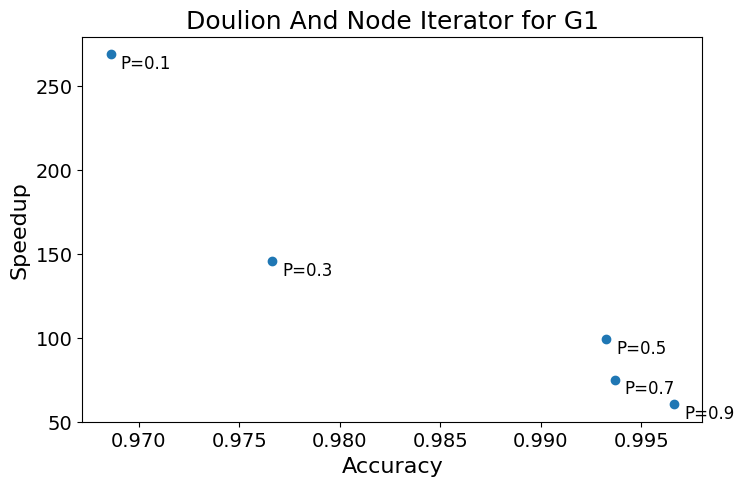

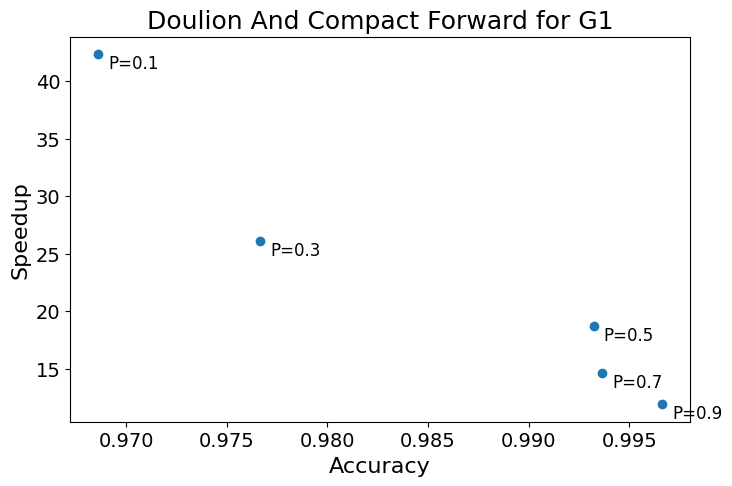

In [ ]:
createplot_accuracy(acc_g1, dni_speedup_g1, 'Doulion And Node Iterator for G1',custom_labels) #plot speedup for NodeIterator
createplot_accuracy(acc_g1, dcf_speedup_g1, 'Doulion And Compact Forward for G1',custom_labels) #plot speedup for Compact Forward

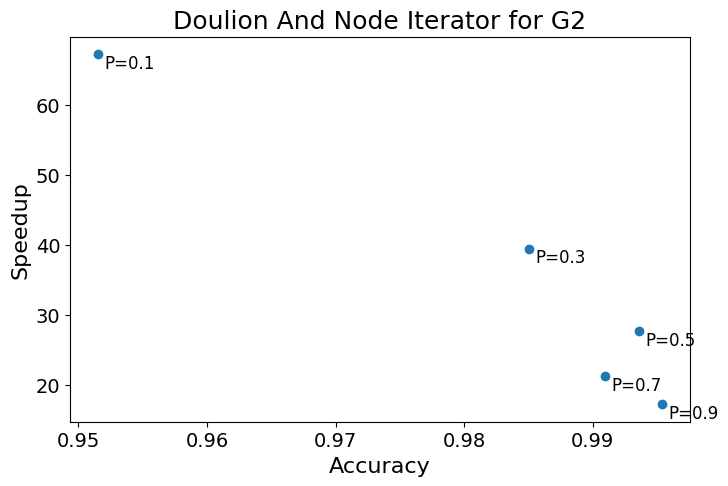

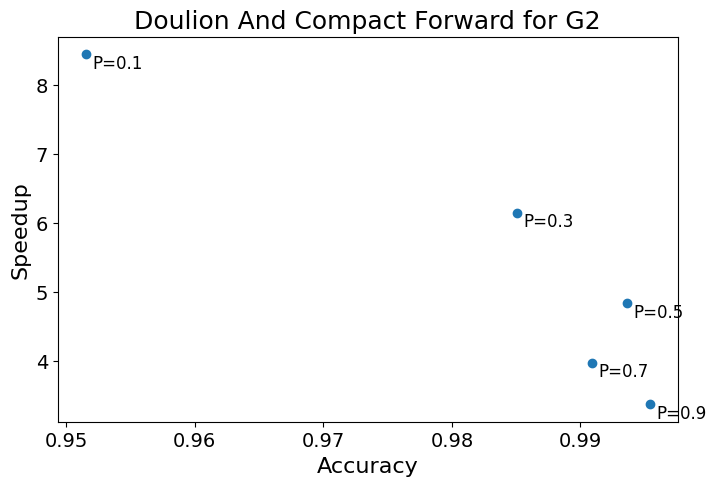

In [ ]:
createplot_accuracy(acc_g2, dni_speedup_g2, 'Doulion And Node Iterator for G2',custom_labels) #plot speedup for NodeIterator
createplot_accuracy(acc_g2, dcf_speedup_g2, 'Doulion And Compact Forward for G2',custom_labels) #plot speedup for Compact Forward

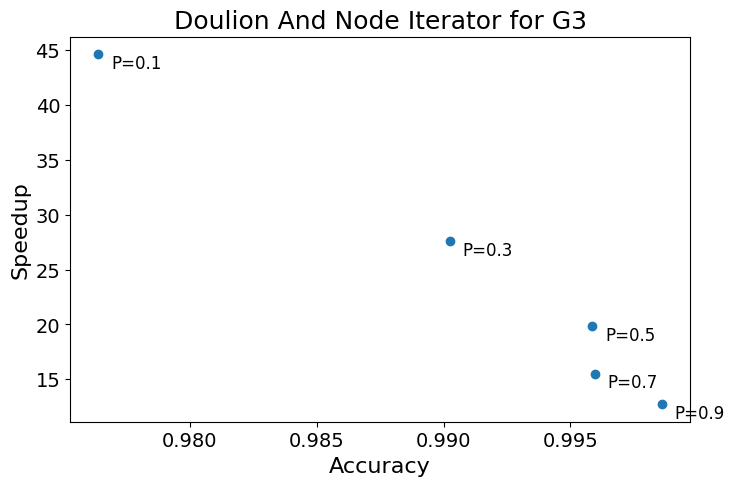

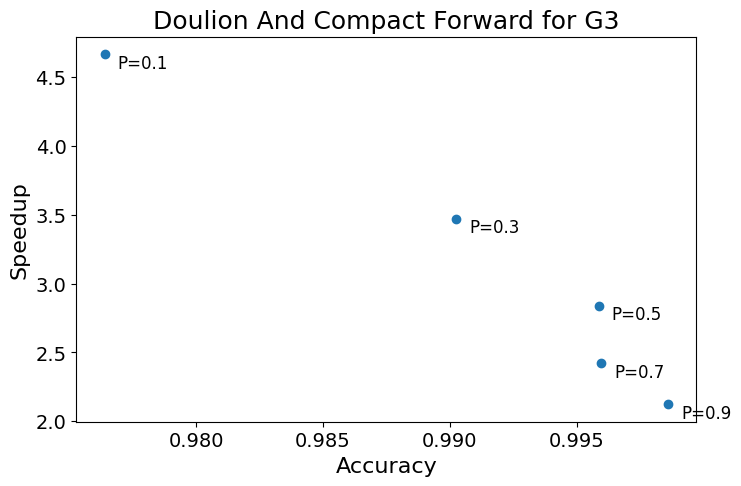

In [ ]:
createplot_accuracy(acc_g3, dni_speedup_g3, 'Doulion And Node Iterator for G3',custom_labels) #plot speedup for NodeIterator
createplot_accuracy(acc_g3, dcf_speedup_g3, 'Doulion And Compact Forward for G3',custom_labels) #plot speedup for Compact Forward

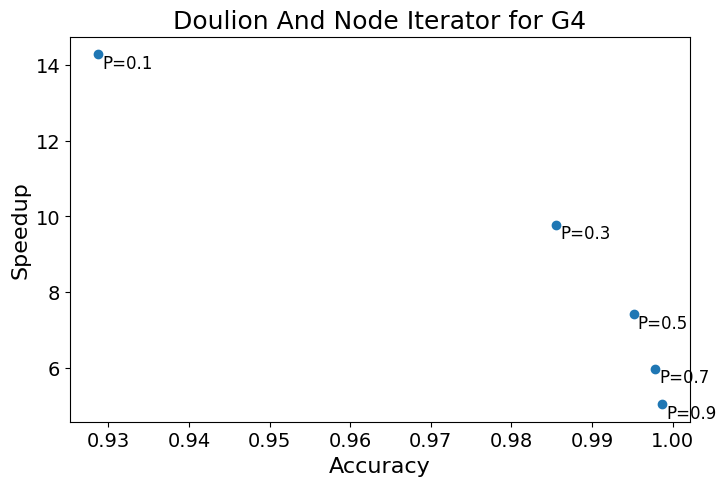

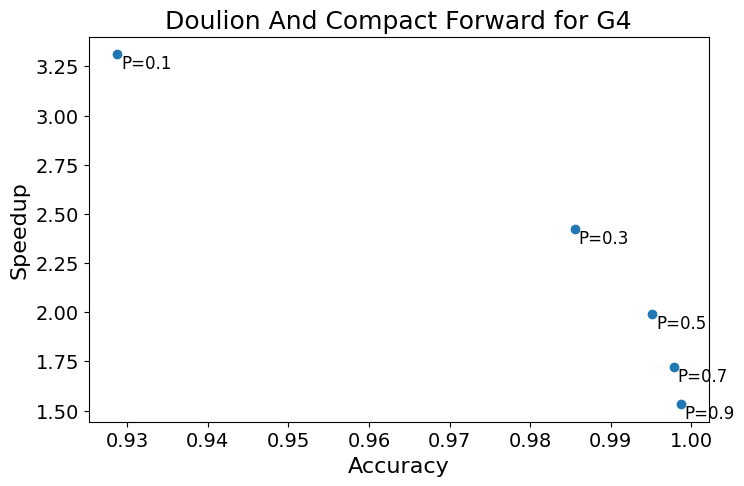

In [ ]:
createplot_accuracy(acc_g4, dni_speedup_g4, 'Doulion And Node Iterator for G4',custom_labels) #plot speedup for NodeIterator
createplot_accuracy(acc_g4, dcf_speedup_g4, 'Doulion And Compact Forward for G4',custom_labels) #plot speedup for Compact Forward

In [ ]:
def createplot_related_error(rel_error, speedup, alg, custom_labels):
  plt.figure(figsize=(8, 5))
  plt.scatter(rel_error,speedup)

    # Add custom labels to points
  if custom_labels:
    for label, x, y in zip(custom_labels, rel_error, speedup):
        # Adjust the coordinates for a bit down and to the right
        adjusted_x = x + 0.0005  # You can adjust this value based on your preference
        adjusted_y = y - 0.0005  # You can adjust this value based on your preference
        plt.text(adjusted_x, adjusted_y, label, fontsize=12, ha='left', va='top')
  plt.scatter
  plt.xlabel('Related_Error', fontsize=16)
  plt.ylabel("Speedup", fontsize=16)
  plt.title(alg, fontsize=18)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.savefig(alg+"_GRQC.png", bbox_inches='tight',dpi=300) #saving the current figure (plot) as an image file.
  #plt.savefig(alg+"_roadCA.png", bbox_inches='tight',dpi=300)
  #plt.savefig(alg+"_CondMat.png", bbox_inches='tight',dpi=300)
  plt.show()




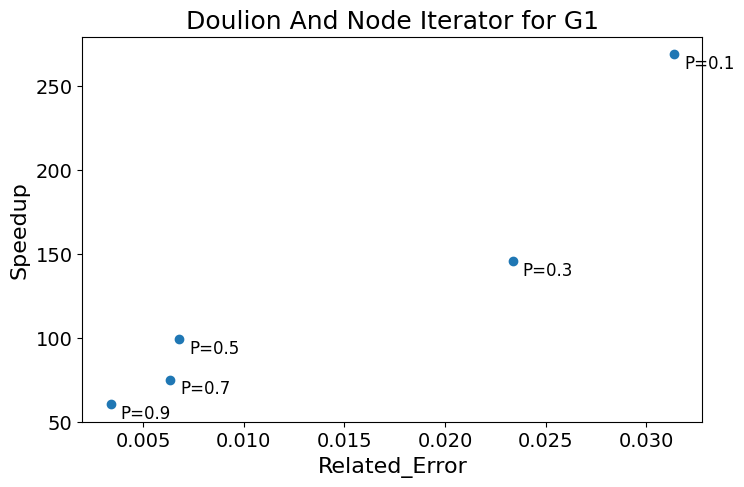

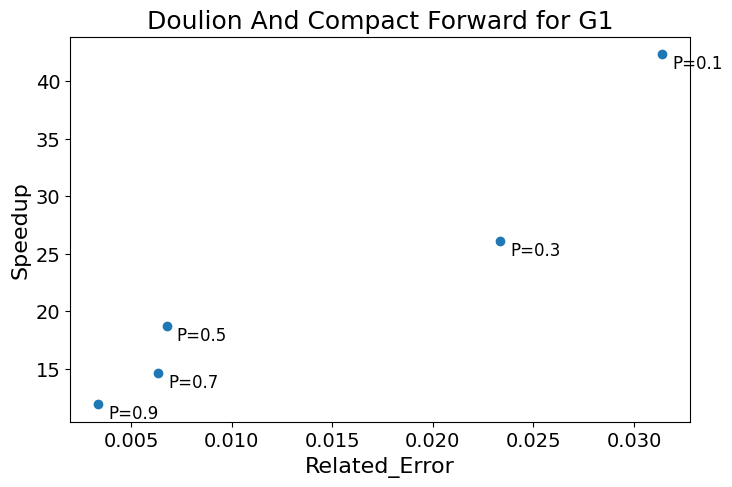

In [ ]:
createplot_related_error(rel_err_g1, dni_speedup_g1, 'Doulion And Node Iterator for G1',custom_labels) #plot speedup for NodeIterator
createplot_related_error(rel_err_g1, dcf_speedup_g1, 'Doulion And Compact Forward for G1',custom_labels) #plot speedup for Compact Forward

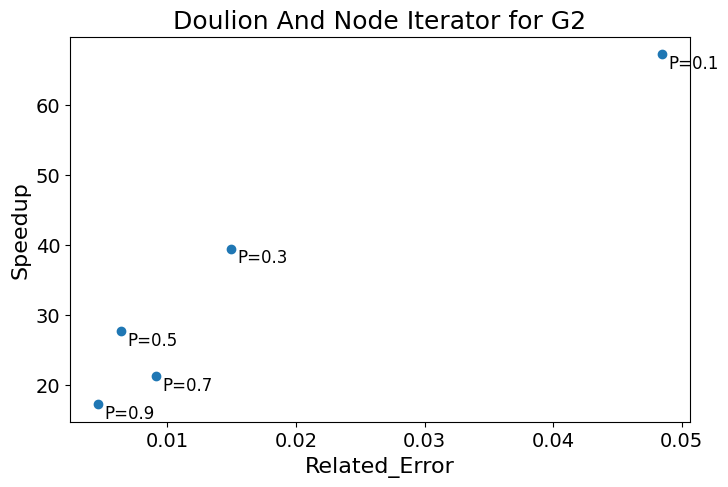

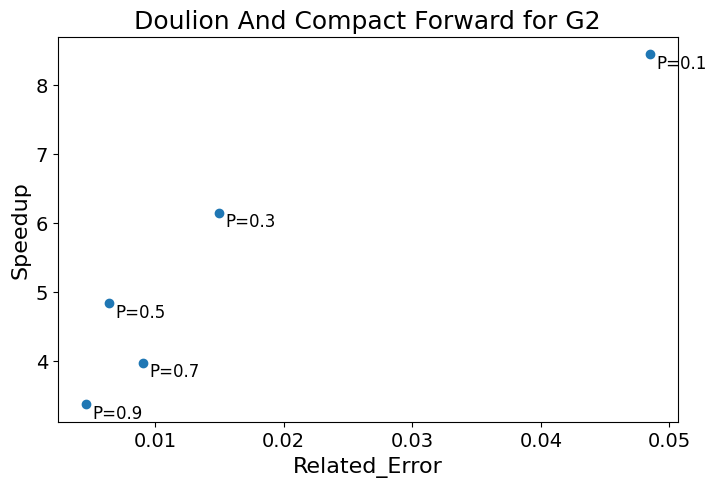

In [ ]:
createplot_related_error(rel_err_g2, dni_speedup_g2, 'Doulion And Node Iterator for G2',custom_labels) #plot speedup for NodeIterator
createplot_related_error(rel_err_g2, dcf_speedup_g2, 'Doulion And Compact Forward for G2',custom_labels) #plot speedup for Compact Forward

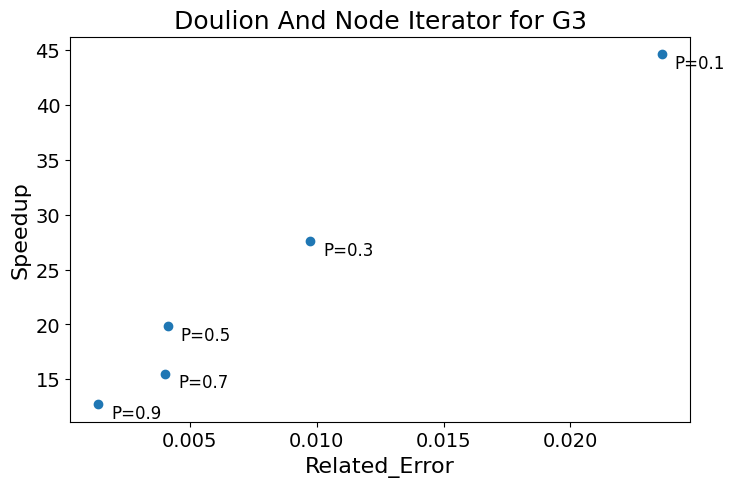

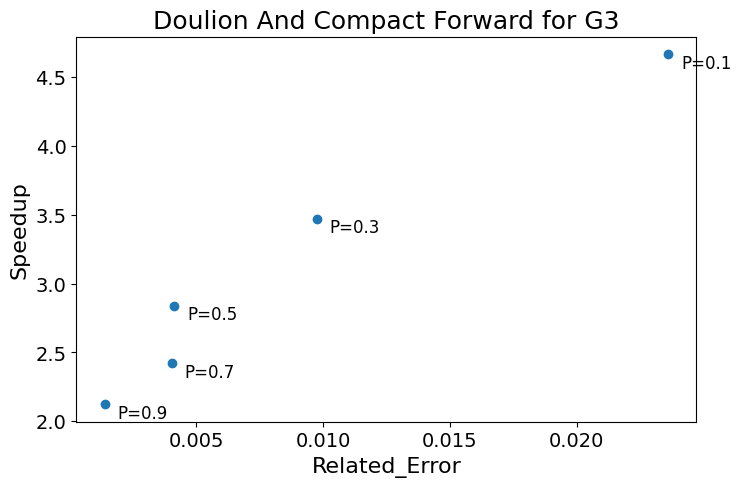

In [ ]:
createplot_related_error(rel_err_g3, dni_speedup_g3, 'Doulion And Node Iterator for G3',custom_labels) #plot speedup for NodeIterator
createplot_related_error(rel_err_g3, dcf_speedup_g3, 'Doulion And Compact Forward for G3',custom_labels) #plot speedup for Compact Forward

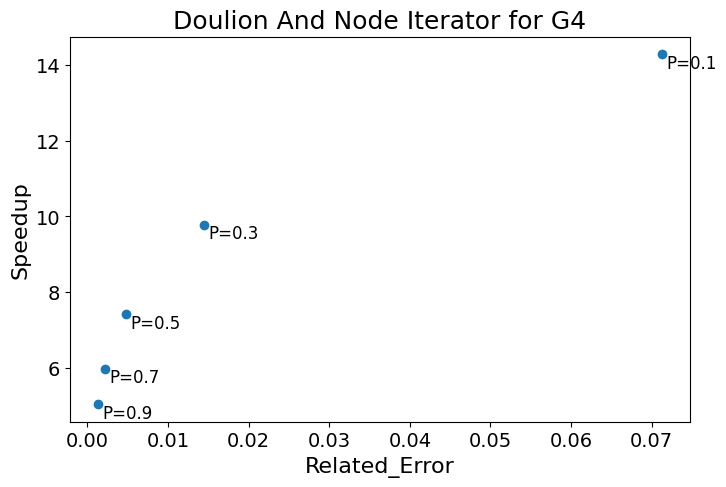

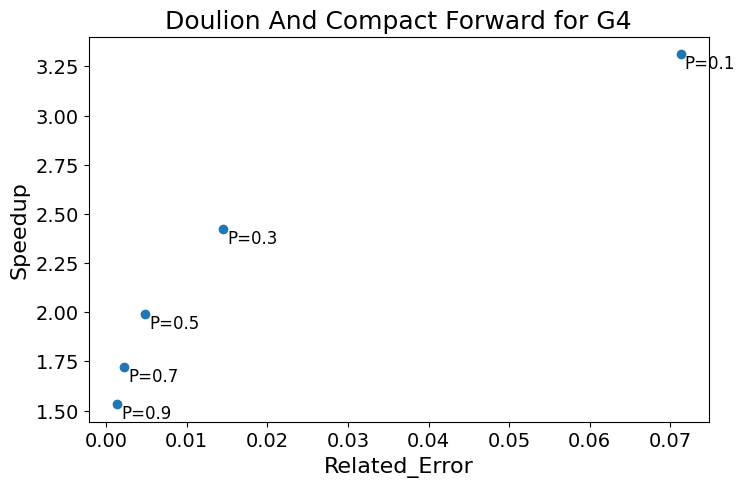

In [ ]:
createplot_related_error(rel_err_g4, dni_speedup_g4, 'Doulion And Node Iterator for G4',custom_labels) #plot speedup for NodeIterator
createplot_related_error(rel_err_g4, dcf_speedup_g4, 'Doulion And Compact Forward for G4',custom_labels) #plot speedup for Compact Forward

##Implementing the Triest algorithm

In [ ]:
import random
import networkx as nx

def update_counters(sample, u, v, t, globalT, localT, M):
    # Update the global and local counters based on the new edge (u, v)
    neighbors_u = set(sample.neighbors(u)) if sample.has_node(u) else set()
    neighbors_v = set(sample.neighbors(v)) if sample.has_node(v) else set()

    common_neighbors = neighbors_u.intersection(neighbors_v)

    for w in common_neighbors:
        if random.random() <= M / t:
            globalT += 1
            localT[u] = localT.get(u, 0) + 1
            localT[v] = localT.get(v, 0) + 1
            localT[w] = localT.get(w, 0) + 1

    return globalT, localT

def sample_edge(sample, u, v, t, M):
    # Sample the edge (u, v) into the graph with probability M/t
    if random.random() <= M / t:
        return True
    return False

def triest_edge_insertion(file_path, M):

    globalT = 0
    localT = {}
    t = 0
    sample = nx.Graph()

    with open(file_path, 'r') as f:
        for line in f:
            t += 1
            u, v = map(int, line.strip().split())

            # Update counters and sample edge
            globalT, localT = update_counters(sample, u, v, t, globalT, localT, M)
            if sample_edge(sample, u, v, t, M):
                sample.add_edge(u, v)

    return globalT, localT
def triest(file_path,triangles, M_values):
    triest_accuracy_list = []
    # Example usage:
    graph = file_path  # Replace with the actual path to your graph file


    for M in M_values:
        global_triangles, local_triangles = triest_edge_insertion(graph, M)
        triest_accuracy = global_triangles / triangles
        print(f"M={M}: Global Triangle Count: {global_triangles}")
        #print(f"M={M}: Local Triangle Counts: {local_triangles}")
        print(f"M={M}: Accuracy: {triest_accuracy}")
        print("-------------------------------------------------")
        triest_accuracy_list.append(triest_accuracy)
    return triest_accuracy_list

In [ ]:
M_values_g5 = [500000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000]  # Experiment with different values of M
g5_triest_accuracy = triest('WikiTalk.txt', 9203519, M_values_g5)

M=500000: Global Triangle Count: 3612244
M=500000: Accuracy: 0.39248509184367414
-------------------------------------------------
M=1000000: Global Triangle Count: 6995841
M=1000000: Accuracy: 0.7601267515175445
-------------------------------------------------
M=1100000: Global Triangle Count: 7582316
M=1100000: Accuracy: 0.8238496601137022
-------------------------------------------------
M=1200000: Global Triangle Count: 8155386
M=1200000: Accuracy: 0.8861160606068179
-------------------------------------------------
M=1300000: Global Triangle Count: 8674215
M=1300000: Accuracy: 0.9424889544966442
-------------------------------------------------
M=1400000: Global Triangle Count: 9167751
M=1400000: Accuracy: 0.9961136604379259
-------------------------------------------------
M=1500000: Global Triangle Count: 9621072
M=1500000: Accuracy: 1.0453688420700822
-------------------------------------------------


In [ ]:
M_values_g1 = [8800, 17600, 26400, 35200, 44000, 52800, 61600, 70400, 79200, 88234]  # Experiment with different values of M
g1_triest_accuracy = triest('facebook_combined.txt',triangles_g1, M_values_g1)

M=8800: Global Triangle Count: 102104
M=8800: Accuracy: 0.06333955744691411
-------------------------------------------------
M=17600: Global Triangle Count: 298996
M=17600: Accuracy: 0.18548023895633403
-------------------------------------------------
M=26400: Global Triangle Count: 553164
M=26400: Accuracy: 0.3431517174211078
-------------------------------------------------
M=35200: Global Triangle Count: 819464
M=35200: Accuracy: 0.5083492037890583
-------------------------------------------------
M=44000: Global Triangle Count: 1091196
M=44000: Accuracy: 0.6769163963002711
-------------------------------------------------
M=52800: Global Triangle Count: 1334444
M=52800: Accuracy: 0.8278137232399303
-------------------------------------------------
M=61600: Global Triangle Count: 1500438
M=61600: Accuracy: 0.9307870298571349
-------------------------------------------------
M=70400: Global Triangle Count: 1577318
M=70400: Accuracy: 0.9784790416932897
------------------------------

In [ ]:
M_values_g2 = [9350, 18700, 28050, 37400, 46750, 56100, 65450, 74800, 84150, 93497]  # Experiment with different values of M
g2_triest_accuracy = triest('CA-CondMat.txt',triangles_g2, M_values_g2)

M=9350: Global Triangle Count: 22130
M=9350: Accuracy: 0.12765270158801575
-------------------------------------------------
M=18700: Global Triangle Count: 58502
M=18700: Accuracy: 0.33745767502494795
-------------------------------------------------
M=28050: Global Triangle Count: 102848
M=28050: Accuracy: 0.5932591528659849
-------------------------------------------------
M=37400: Global Triangle Count: 151745
M=37400: Accuracy: 0.8753122097819002
-------------------------------------------------
M=46750: Global Triangle Count: 203224
M=46750: Accuracy: 1.1722590432680937
-------------------------------------------------
M=56100: Global Triangle Count: 253704
M=56100: Accuracy: 1.4634433350061433
-------------------------------------------------
M=65450: Global Triangle Count: 302660
M=65450: Accuracy: 1.7458367222154925
-------------------------------------------------
M=74800: Global Triangle Count: 349198
M=74800: Accuracy: 2.0142823357041086
------------------------------------

In [ ]:
M_values_g3 = [92587, 185174, 277761, 370348, 462935, 555522, 648109, 740696, 833283, 925872]  # Experiment with different values of M
g3_triest_accuracy = triest('roadNet-CA.txt',triangles_g3, M_values_g3)

M=92587: Global Triangle Count: 9686
M=92587: Accuracy: 0.014518931121267401
-------------------------------------------------
M=185174: Global Triangle Count: 20976
M=185174: Accuracy: 0.03144219483787993
-------------------------------------------------
M=277761: Global Triangle Count: 31743
M=277761: Accuracy: 0.04758150222820474
-------------------------------------------------
M=370348: Global Triangle Count: 42279
M=370348: Accuracy: 0.06337454974974854
-------------------------------------------------
M=462935: Global Triangle Count: 53599
M=462935: Accuracy: 0.08034278228048848
-------------------------------------------------
M=555522: Global Triangle Count: 64995
M=555522: Accuracy: 0.09742493580701783
-------------------------------------------------
M=648109: Global Triangle Count: 76032
M=648109: Accuracy: 0.11396896252448926
-------------------------------------------------
M=740696: Global Triangle Count: 87475
M=740696: Accuracy: 0.13112156719315154
--------------------

In [ ]:
M_values_g4 = [277660, 555320, 832980, 1110640, 1388300, 1665960, 1943620, 2221280, 2498940, 2766607]  # Experiment with different values of M
g4_triest_accuracy = triest('com-amazon.ungraph.txt',triangles_g4, M_values_g4)

M=277660: Global Triangle Count: 230525
M=277660: Accuracy: 1.9102804202989825
-------------------------------------------------
M=555320: Global Triangle Count: 507537
M=555320: Accuracy: 4.205782425668732
-------------------------------------------------
M=832980: Global Triangle Count: 656611
M=832980: Accuracy: 5.441106765222579
-------------------------------------------------
M=1110640: Global Triangle Count: 667129
M=1110640: Accuracy: 5.528265769498492
-------------------------------------------------
M=1388300: Global Triangle Count: 667129
M=1388300: Accuracy: 5.528265769498492
-------------------------------------------------
M=1665960: Global Triangle Count: 667129
M=1665960: Accuracy: 5.528265769498492
-------------------------------------------------
M=1943620: Global Triangle Count: 667129
M=1943620: Accuracy: 5.528265769498492
-------------------------------------------------
M=2221280: Global Triangle Count: 667129
M=2221280: Accuracy: 5.528265769498492
---------------

##Plotting metrics

In [ ]:
def createplot_accuracy_triest(accuracy,alg,M,edges):
  plt.figure(figsize=(8, 5))
  percentage = []
  for value in M:
    percentage.append((value / edges)*100)
  plt.scatter(accuracy,percentage)

  for acc, perc in zip(accuracy, percentage):
        adjusted_acc = acc + 0.005  # You can adjust this value based on your preference
        adjusted_perc = perc - 0.005  # You can adjust this value based on your preference
        plt.text(adjusted_acc, adjusted_perc, f'{acc:.3f}', fontsize=8, verticalalignment='top', horizontalalignment='left')
  plt.scatter
  plt.xlabel('Accuracy', fontsize=16)
  plt.ylabel("% of total edges", fontsize=16)

  plt.title(alg, fontsize=18)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.savefig(alg+"_GRQC.png", bbox_inches='tight',dpi=300) #saving the current figure (plot) as an image file.
  #plt.savefig(alg+"_roadCA.png", bbox_inches='tight',dpi=300)
  #plt.savefig(alg+"_CondMat.png", bbox_inches='tight',dpi=300)
  plt.show()




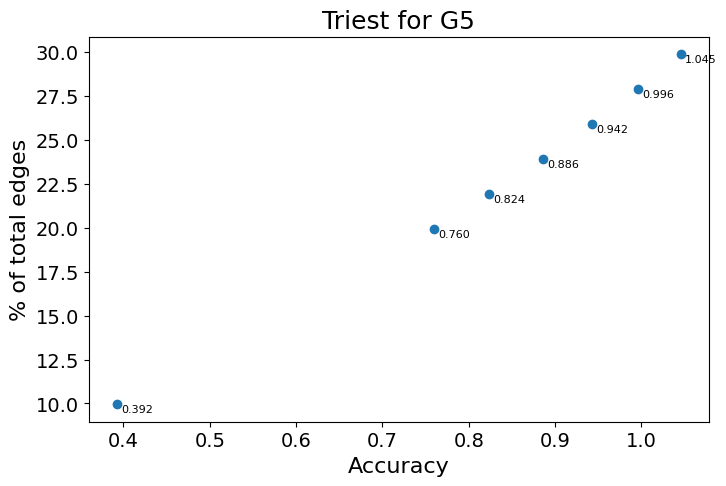

In [ ]:
createplot_accuracy_triest(g5_triest_accuracy, 'Triest for G5',M_values_g5,5021410)  # Experiment with different values of M) #plot speedup for NodeIterator

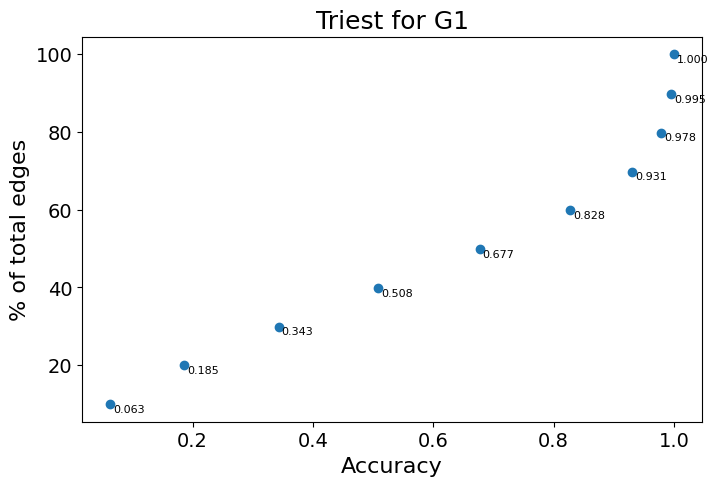

In [ ]:
createplot_accuracy_triest(g1_triest_accuracy, 'Triest for G1',M_values_g1,88234)  # Experiment with different values of M) #plot speedup for NodeIterator

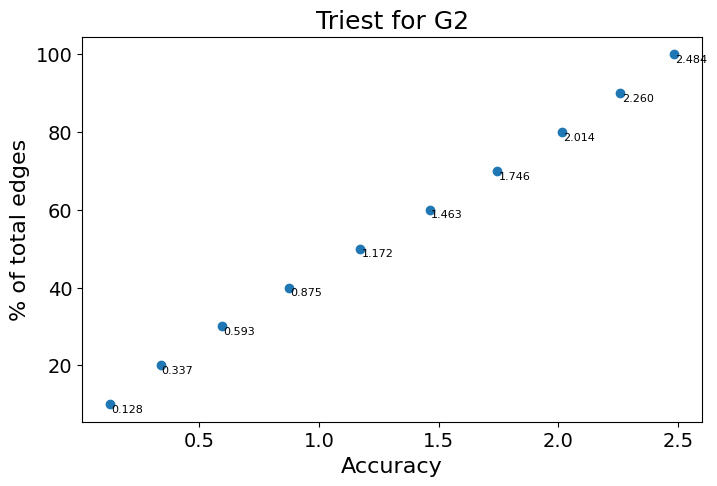

In [ ]:
createplot_accuracy_triest(g2_triest_accuracy, 'Triest for G2',M_values_g2,93497)  # Experiment with different values of M) #plot speedup for NodeIterator

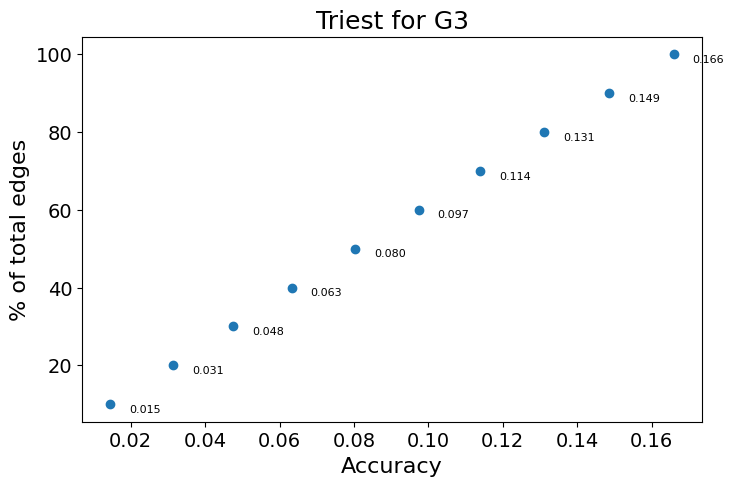

In [ ]:
createplot_accuracy_triest(g3_triest_accuracy, 'Triest for G3',M_values_g3,925872)  # Experiment with different values of M) #plot speedup for NodeIterator

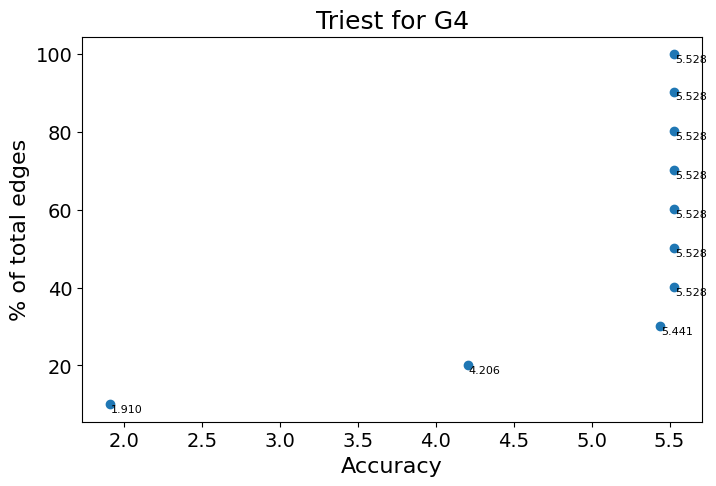

In [ ]:
createplot_accuracy_triest(g4_triest_accuracy, 'Triest for G4',M_values_g4,2766607)  # Experiment with different values of M) #plot speedup for NodeIterator